### Melchizedek Ackah-Blay


#### Predicting Football Player Goal Scoring: A Machine Learning Approach

##### 3 September 2024 - 7 September 2024

##### **Project Overview** 

##### The aim of this project is to develop a machine learning model to predict the number of goals a football player will score by the end of the season. This involves analyzing various player metrics, such as their performance in previous seasons, playing time, and position. I will explore the data, engineer relevant features, build and evaluate a predictive model, and provide insights on how to forecast a player's goal tally. The project will also focus on identifying key metrics that influence goal-scoring performance and recommending strategies to enhance player scoring potential based on the analysis. 
#####

##### **Data Collection and Preparation** 

In [63]:
#importing the necessary libraries for data exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('ggplot')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.metrics import auc, accuracy_score, roc_curve

In [77]:
#loading the dataset 
season_data = pd.read_csv(r'/Users/melki/Desktop/season_data.csv')

In [78]:
season_data.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP',
       'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt',
       'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR',
       'Gls_90', 'Ast_90', 'G+A_90', 'G-PK_90', 'G+A-PK_90', 'xG_90', 'xAG_90',
       'xG+xAG_90', 'npxG_90', 'npxG+xAG_90'],
      dtype='object')

In [79]:
#displaying the top rows to see a glimpse of the overall data
display(season_data.head(4))

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Gls_90,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90
0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,23.0,2000.0,20,13,...,0.00,0.07,0.07,0.00,0.07,0.00,0.06,0.06,0.00,0.06
1,2,Brenden Aaronson,us USA,"MF,FW",Union Berlin,de Bundesliga,22.0,2000.0,30,14,...,0.14,0.14,0.28,0.14,0.28,0.14,0.13,0.27,0.14,0.27
2,3,Paxten Aaronson,us USA,MF,Eint Frankfurt,de Bundesliga,19.0,2003.0,7,1,...,0.00,0.89,0.89,0.00,0.89,0.11,0.07,0.19,0.11,0.19
3,4,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,17.0,2006.0,1,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


#### renaming columns to be user friendly

In [80]:
season_data.rename(columns={
    'Rk': 'rank',
    'Player': 'player_name',
    'Nation': 'nationality',
    'Pos': 'position',
    'Squad': 'team',
    'Comp': 'competition',
    'Age': 'age',
    'Born': 'birth_year',
    'MP': 'matches_played',
    'Starts': 'starts',
    'Min': 'minutes_played',
    '90s': 'minutes_per_90',
    'Gls': 'goals',
    'Ast': 'assists',
    'G+A': 'goals_and_assists',
    'G-PK': 'goals_minus_penalties',
    'PK': 'penalties_scored',
    'PKatt': 'penalties_attempted',
    'CrdY': 'yellow_cards',
    'CrdR': 'red_cards',
    'xG': 'expected_goals',
    'npxG': 'non_penalty_expected_goals',
    'xAG': 'expected_assists',
    'npxG+xAG': 'non_penalty_expected_goals_and_assists',
    'PrgC': 'progressive_carries',
    'PrgP': 'progressive_passes',
    'PrgR': 'progressive_runs',
    'Gls_90': 'goals_per_90',
    'Ast_90': 'assists_per_90',
    'G+A_90': 'goals_and_assists_per_90',
    'G-PK_90': 'goals_minus_penalties_per_90',
    'G+A-PK_90': 'goals_and_assists_minus_penalties_per_90',
    'xG_90': 'expected_goals_per_90',
    'xAG_90': 'expected_assists_per_90',
    'xG+xAG_90': 'expected_goals_and_assists_per_90',
    'npxG_90': 'non_penalty_expected_goals_per_90',
    'npxG+xAG_90': 'non_penalty_expected_goals_and_assists_per_90'
}, inplace=True)


In [83]:
# verifying
display(season_data.head(4))

,rank,player_name,nationality,position,team,competition,age,birth_year,matches_played,starts,...,goals_per_90,assists_per_90,goals_and_assists_per_90,goals_minus_penalties_per_90,goals_and_assists_minus_penalties_per_90,expected_goals_per_90,expected_assists_per_90,expected_goals_and_assists_per_90,non_penalty_expected_goals_per_90,non_penalty_expected_goals_and_assists_per_90
0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,23.0,2000.0,20,13,...,0.00,0.07,0.07,0.00,0.07,0.00,0.06,0.06,0.00,0.06
1,2,Brenden Aaronson,us USA,"MF,FW",Union Berlin,de Bundesliga,22.0,2000.0,30,14,...,0.14,0.14,0.28,0.14,0.28,0.14,0.13,0.27,0.14,0.27
2,3,Paxten Aaronson,us USA,MF,Eint Frankfurt,de Bundesliga,19.0,2003.0,7,1,...,0.00,0.89,0.89,0.00,0.89,0.11,0.07,0.19,0.11,0.19
3,4,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,17.0,2006.0,1,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [82]:
#checking the shape of data
season_data.shape

(2852, 37)

#### **EXPLORATORY DATA ANALYSIS ON SEASON DATA**

##### **1. What is the average number of goals scored in the season** 

In [232]:
season_data['goals'].mean()

1.720196353436185

##### *On average, players scored about 2 goals in the 2023-2024 season in the top 5 European leagues*

##### **2. What is the average age of players in the 2023-2024 season** 

In [231]:
season_data['age'].mean()

25.06074438202247

##### *The average age of players in the 2023-2024 season was 25*

##### **3. What is the distribution of positions of players in the 2023-2024 season** 

In [233]:
season_data['position'].value_counts(normalize = True)

position
DF       0.297335
MF       0.199509
FW       0.141304
FW,MF    0.112202
MF,FW    0.085905
GK       0.071178
DF,MF    0.037868
MF,DF    0.028401
DF,FW    0.016480
FW,DF    0.009818
Name: proportion, dtype: float64

##### *29.7% of players in the 2023-2024 season were defenders*
##### *19.95% of players in the 2023-2024 season were midfielders*
##### *14.13% of players in the 2023-2024 season were forwards/attackers*
##### *19.81% of players in the 2023-2024 season played as both forwards and midfields*
##### *7.12% of players in the 2023-2024 season were goalkeepers*
##### *6.62% of players in the 2023-2024 season played as both midfielders and defenders*
##### *2.62% of players in the 2023-2024 season played as both forwards and defenders*

##### **4. Who are the top 10 players with the most goals in the 2023-2024 season** 

In [234]:
season_data.groupby('player_name')['goals'].sum().sort_values(ascending = False).head(10)

player_name
Harry Kane           36
Serhou Guirassy      28
Erling Haaland       27
Kylian Mbappé        27
Lautaro Martínez     24
Loïs Openda          24
Artem Dovbyk         24
Alexander Sørloth    23
Cole Palmer          22
Alexander Isak       21
Name: goals, dtype: int64

##### *The top scorers in the 2023-2024 season were Harry Kane (Bayern Munich), Serhou Guirassy (Dortmund), Erling Haaland (Manchester City), Kylian Mbappé (Paris Saint Germain), Lautaro Martínez (Inter Milan)*

##### **5. Who are the top 10 players with the most assists in the 2023-2024 season**

In [235]:
season_data.groupby('player_name')['assists'].sum().sort_values(ascending = False).head(10)

player_name
Alex Baena          14
Álex Grimaldo       13
Ollie Watkins       13
Leroy Sané          11
Florian Wirtz       11
Jan-Niklas Beste    11
Nico Williams       11
Xavi Simons         11
Julian Brandt       11
Cole Palmer         11
Name: assists, dtype: int64

##### *The top assisters in the 2023-2024 season were Alex Baena, Alex Grimaldo, Ollie Watkins, Leroy Sané, and Florian Wirtz*

##### **6. What is the average number of goals per 90 minutes**

In [236]:
season_data['goals_per_90'].mean()

0.12177769985974757

##### *There were 0.12 goals per 90 minutes in the 2023-2024 season which is quite low*

##### **DISTRIBUTION ANALYSIS**

##### **7. How many players belong to each nation**

In [238]:
season_data['nationality'].value_counts()

nationality
es ESP     404
fr FRA     333
de GER     263
it ITA     243
eng ENG    217
          ... 
cf CTA       1
au AUS       1
sl SLE       1
lt LTU       1
mt MLT       1
Name: count, Length: 107, dtype: int64

##### *Spain, France, Germany, Italy and England had the largest share of players in the 2023-2024 season*

##### **8. What is the distribution of yellow cards and red cards across players**

In [241]:
season_data.groupby('player_name')['yellow_cards'].sum().sort_values(ascending = False).head(1)

player_name
Iván Alejo    17
Name: yellow_cards, dtype: int64

In [242]:
season_data.groupby('player_name')['red_cards'].sum().sort_values(ascending = False).head(1)

player_name
Maxence Lacroix    3
Name: red_cards, dtype: int64

##### *Iván Allejo received the most yellow cards totaling 17*
##### *Maxence Lacroix received the most red cards totaling 3*

##### **PERFORMANCE ANALYSIS**

##### **9. Which team has the highest expected goals (XG)**

In [244]:
season_data.groupby('team')['expected_goals'].sum().sort_values(ascending = False).head(3)

team
Liverpool          90.3
Bayern Munich      87.3
Manchester City    82.0
Name: expected_goals, dtype: float64

##### *Liverpool had the highest expected goals at 90.3, followed closely by Bayern Munich (97.3) and Manchester City (82.0)*

##### **10. What is the correlation between minutes played and goals scored**

In [245]:
min_goal_corr = season_data['minutes_played'].corr(season_data['goals'])
min_goal_corr

0.40714670700665107

##### *There is a moderately positive correlation between minutes played and goals scored*

##### **ADVANCED METRICS**

##### **11. Which players have the highest contribution to goals plus assists per 90 minutes**

In [246]:
season_data.groupby('player_name')['goals_and_assists_per_90'].sum().sort_values(ascending = False).head(5)

player_name
Christian Kühlwetter     11.25
Rareș-Cătălin Burnete    11.25
Miloš Pantović            6.00
Federico Di Francesco     6.00
Noah Mbamba               5.63
Name: goals_and_assists_per_90, dtype: float64

##### *Players with the highest contributions to goals and assists over 90 minutes are Christian Kühlwetter, Rareș-Cătălin Burnete, Miloš Pantović, Federico Di Francesco, and Noah Mbamba* 

##### **12. How many players have more expected goals than actual goals**

In [250]:
len(season_data[season_data['expected_goals'] > season_data['goals']])

1380

##### *1,390 of the 2,852 players had more expected goals than actual goals in the 2023-2024 season*

##### **13. Which player has the highest combined expected goals and assists per 90 minutes**

In [251]:
season_data.groupby('player_name')['expected_goals_and_assists_per_90'].sum().sort_values(ascending = False).head(1)

player_name
Christian Kühlwetter    6.85
Name: expected_goals_and_assists_per_90, dtype: float64

##### *Christian Kühlwetter had the highest combined xG and xA at 6.85*

##### **DATA ANALYSIS VIA VISUALIZATIONS**

##### **14. Distribution of player ages**

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


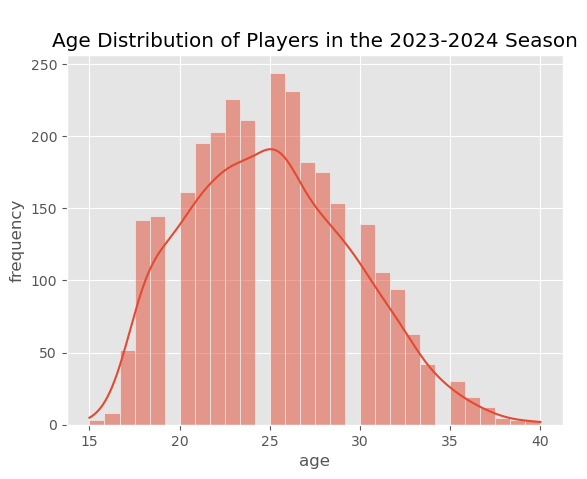

In [260]:
sns.histplot(season_data['age'], kde=True)
plt.title('\nAge Distribution of Players in the 2023-2024 Season')
plt.xlabel('age')
plt.ylabel('frequency')
plt.show()

##### **15. Goals vs Assists**

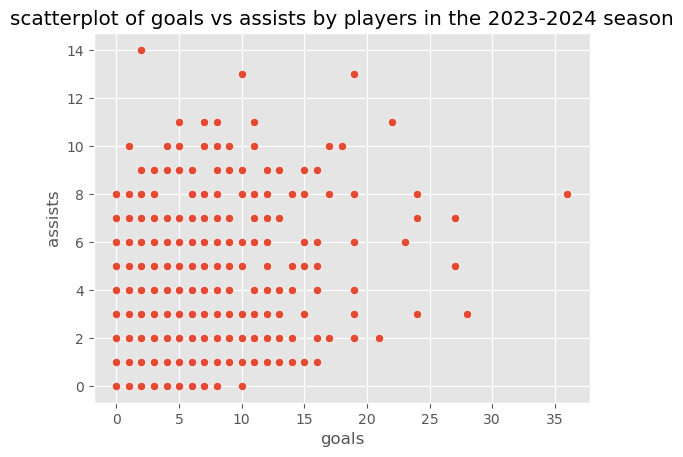

In [261]:
sns.scatterplot(x='goals', y='assists', data=season_data)
plt.title('scatterplot of goals vs assists by players in the 2023-2024 season')
plt.show()

##### **16. Top Players by Goals and Assists**

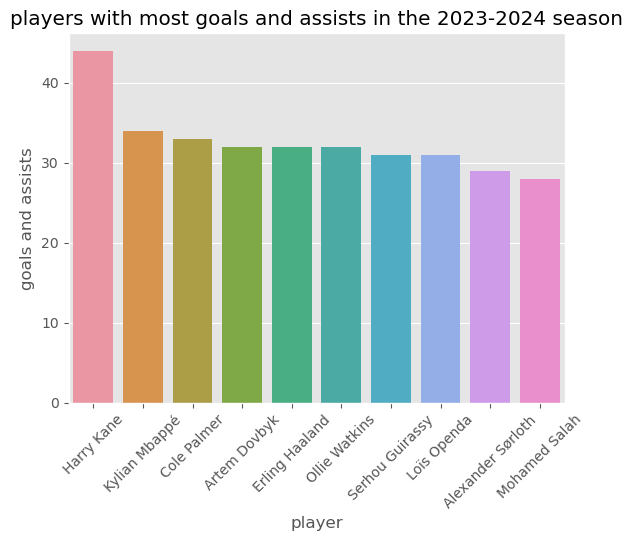

In [267]:
top_players = season_data.nlargest(10, 'goals_and_assists')
sns.barplot(x='player_name', y='goals_and_assists', data=top_players)
plt.xticks(rotation=45)
plt.title('players with most goals and assists in the 2023-2024 season')
plt.xlabel('player')
plt.ylabel('goals and assists')
plt.show()

##### **17. Goals per 90 Minutes vs. Expected Goals per 90 Minutes**

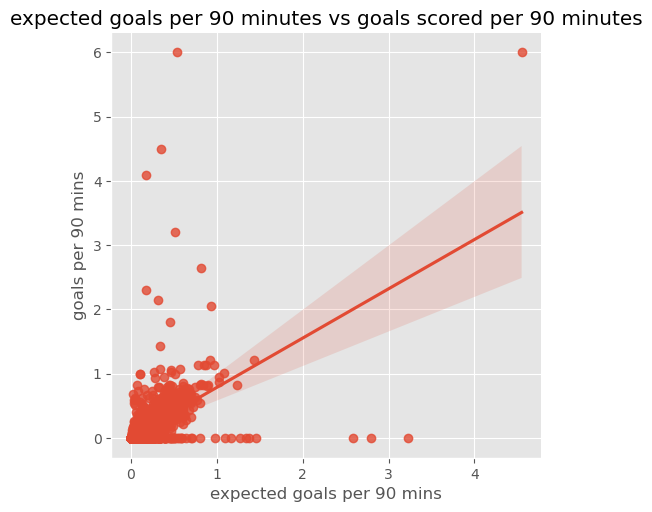

In [269]:
sns.lmplot(x='expected_goals_per_90', y='goals_per_90', data=season_data)
plt.title('expected goals per 90 minutes vs goals scored per 90 minutes')
plt.xlabel('expected goals per 90 mins')
plt.ylabel('goals per 90 mins')
plt.show()

##### **18. Progressive Carries by Position**

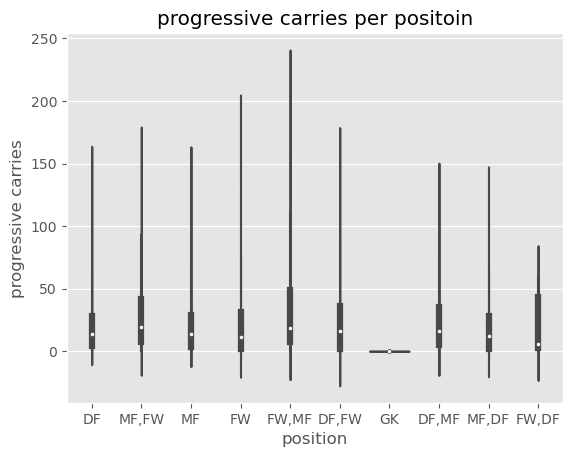

In [277]:
sns.violinplot(x = 'position', y = 'progressive_carries', data = season_data)
plt.title('progressive carries per positoin')
plt.ylabel('progressive carries')
plt.show()

##### **19. Goals and Assists by Age**

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

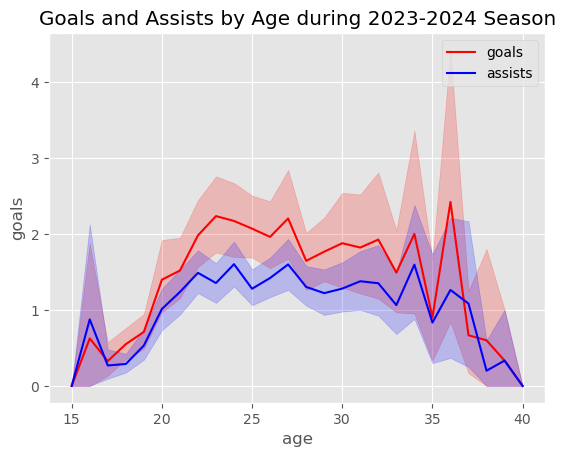

In [283]:
sns.lineplot(x='age', y='goals', data = season_data,  c = 'red', label = 'goals')
sns.lineplot(x='age', y='assists', data = season_data, c = 'blue', label = 'assists')
plt.title('Goals and Assists by Age during 2023-2024 Season')
plt.legend()
plt.show()

#### **filtering by numerical columns**

In [84]:
numerical_columns = season_data.drop(columns = ['player_name', 'nationality', 'team', 'position', 'competition'])

In [85]:
numerical_columns.head(4)

,rank,age,birth_year,matches_played,starts,minutes_played,minutes_per_90,goals,assists,goals_and_assists,...,goals_per_90,assists_per_90,goals_and_assists_per_90,goals_minus_penalties_per_90,goals_and_assists_minus_penalties_per_90,expected_goals_per_90,expected_assists_per_90,expected_goals_and_assists_per_90,non_penalty_expected_goals_per_90,non_penalty_expected_goals_and_assists_per_90
0,1,23.0,2000.0,20,13,1237,13.7,0,1,1,...,0.00,0.07,0.07,0.00,0.07,0.00,0.06,0.06,0.00,0.06
1,2,22.0,2000.0,30,14,1267,14.1,2,2,4,...,0.14,0.14,0.28,0.14,0.28,0.14,0.13,0.27,0.14,0.27
2,3,19.0,2003.0,7,1,101,1.1,0,1,1,...,0.00,0.89,0.89,0.00,0.89,0.11,0.07,0.19,0.11,0.19
3,4,17.0,2006.0,1,0,4,0.0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [86]:
numerical_columns.drop(columns = ['goals_minus_penalties',
    'goals_and_assists',
    'non_penalty_expected_goals',
    'non_penalty_expected_goals_and_assists',
    'goals_per_90',
    'goals_and_assists_per_90',
    'goals_minus_penalties_per_90',
    'goals_and_assists_minus_penalties_per_90',
    'expected_goals_and_assists_per_90',
    'non_penalty_expected_goals_and_assists_per_90'], inplace = True)

correlation = numerical_columns.corr()
display(correlation)

,rank,age,birth_year,matches_played,starts,minutes_played,minutes_per_90,goals,assists,penalties_scored,...,red_cards,expected_goals,expected_assists,progressive_carries,progressive_passes,progressive_runs,assists_per_90,expected_goals_per_90,expected_assists_per_90,non_penalty_expected_goals_per_90
rank,1.000000,0.026363,-0.028722,0.039735,0.038177,0.042819,0.042790,0.019696,0.026871,0.018468,...,0.012661,0.016453,0.009555,0.005411,0.024297,0.011153,-0.017966,0.021603,0.007228,0.020394
age,0.026363,1.000000,-0.994687,0.237786,0.254977,0.254521,0.254570,0.065507,0.080411,0.092317,...,0.078920,0.076112,0.104744,0.004180,0.175653,0.036155,-0.015298,-0.023493,-0.003033,-0.043027
birth_year,-0.028722,-0.994687,1.000000,-0.241570,-0.257952,-0.257613,-0.257657,-0.067403,-0.082989,-0.095126,...,-0.082479,-0.077719,-0.107402,-0.006925,-0.179629,-0.038968,0.016779,0.023133,0.004514,0.043148
matches_played,0.039735,0.237786,-0.241570,1.000000,0.897578,0.917165,0.917170,0.445690,0.507686,0.209070,...,0.160595,0.488737,0.567757,0.589169,0.677305,0.568626,0.015292,0.088399,-0.006495,0.066778
starts,0.038177,0.254977,-0.257952,0.897578,1.000000,0.994046,0.994041,0.412909,0.483572,0.231085,...,0.180361,0.435080,0.535492,0.548447,0.718328,0.483080,-0.007325,-0.021422,-0.039129,-0.043987
minutes_played,0.042819,0.254521,-0.257613,0.917165,0.994046,1.000000,0.999997,0.407147,0.475767,0.223400,...,0.171945,0.430778,0.528035,0.542788,0.715835,0.477507,-0.008837,-0.016815,-0.041278,-0.038844
minutes_per_90,0.042790,0.254570,-0.257657,0.917170,0.994041,0.999997,1.000000,0.407126,0.475743,0.223413,...,0.171988,0.430762,0.528016,0.542744,0.715798,0.477500,-0.008785,-0.016851,-0.041248,-0.038887
goals,0.019696,0.065507,-0.067403,0.445690,0.412909,0.407147,0.407126,1.000000,0.570193,0.590330,...,0.040017,0.930810,0.604908,0.498129,0.305693,0.655088,0.080318,0.465908,0.100499,0.409608
assists,0.026871,0.080411,-0.082989,0.507686,0.483572,0.475767,0.475743,0.570193,1.000000,0.352571,...,0.073476,0.592626,0.875505,0.691089,0.547597,0.730537,0.228638,0.218911,0.198383,0.186466
penalties_scored,0.018468,0.092317,-0.095126,0.209070,0.231085,0.223400,0.223413,0.590330,0.352571,1.000000,...,0.015352,0.613720,0.390398,0.228815,0.226799,0.321582,0.049299,0.289545,0.064687,0.175173


In [87]:
goals_correlation = correlation['goals'].sort_values(ascending=False)
goals_correlation

goals                                1.000000
expected_goals                       0.930810
progressive_runs                     0.655088
penalties_attempted                  0.615905
expected_assists                     0.604908
penalties_scored                     0.590330
assists                              0.570193
progressive_carries                  0.498129
expected_goals_per_90                0.465908
matches_played                       0.445690
starts                               0.412909
non_penalty_expected_goals_per_90    0.409608
minutes_played                       0.407147
minutes_per_90                       0.407126
progressive_passes                   0.305693
yellow_cards                         0.222930
expected_assists_per_90              0.100499
assists_per_90                       0.080318
age                                  0.065507
red_cards                            0.040017
rank                                 0.019696
birth_year                        

In [88]:
# Define a threshold below which columns will be dropped
correlation_threshold = 0.3

# Get columns with correlation above the threshold
columns_to_keep = [col for col, corr in goals_correlation.items() if corr >= correlation_threshold]

# Drop columns that are not in the columns_to_keep list
numerical_columns = numerical_columns[columns_to_keep]

#### *looking at the shape of the dataset*

In [89]:
numerical_columns.shape

(2852, 15)

#### *addressing null values*

In [90]:
correlated_data = numerical_columns

In [91]:
correlated_data.isna().sum()

goals                                0
expected_goals                       1
progressive_runs                     1
penalties_attempted                  0
expected_assists                     1
penalties_scored                     0
assists                              0
progressive_carries                  1
expected_goals_per_90                1
matches_played                       0
starts                               0
non_penalty_expected_goals_per_90    1
minutes_played                       0
minutes_per_90                       0
progressive_passes                   1
dtype: int64

#### *since there are very few null values (4), and over 2000 rows, dropping them won't be harmful*

In [92]:
correlated_data.dropna(inplace = True)

#### *verifying*

In [93]:
correlated_data.isna().sum()

goals                                0
expected_goals                       0
progressive_runs                     0
penalties_attempted                  0
expected_assists                     0
penalties_scored                     0
assists                              0
progressive_carries                  0
expected_goals_per_90                0
matches_played                       0
starts                               0
non_penalty_expected_goals_per_90    0
minutes_played                       0
minutes_per_90                       0
progressive_passes                   0
dtype: int64

In [94]:
correlated_data.shape

(2851, 15)

In [96]:
correlated_data.columns

Index(['goals', 'expected_goals', 'progressive_runs', 'penalties_attempted',
       'expected_assists', 'penalties_scored', 'assists',
       'progressive_carries', 'expected_goals_per_90', 'matches_played',
       'starts', 'non_penalty_expected_goals_per_90', 'minutes_played',
       'minutes_per_90', 'progressive_passes'],
      dtype='object')

#### *using SelectKBest to narrow down the proposed x values even more*

In [95]:
from sklearn.feature_selection import SelectKBest, f_regression

In [114]:
x = correlated_data.drop(columns = ['goals', 'penalties_scored', 'non_penalty_expected_goals_per_90', 'expected_goals_per_90'])
display(x.head(4))
y = correlated_data['goals']

,expected_goals,progressive_runs,penalties_attempted,expected_assists,assists,progressive_carries,matches_played,starts,minutes_played,minutes_per_90,progressive_passes
0,0.0,26.0,0,0.8,1,22.0,20,13,1237,13.7,43.0
1,2.0,91.0,0,1.9,2,37.0,30,14,1267,14.1,56.0
2,0.1,7.0,0,0.1,1,2.0,7,1,101,1.1,5.0
3,0.0,0.0,0,0.0,0,0.0,1,0,4,0.0,0.0


In [206]:
selector = SelectKBest(score_func=f_regression, k=5)
x_selected = selector.fit_transform(x, y)

#### *seeing what columns got selected*

In [207]:
# Get the boolean mask of selected features
selected_mask = selector.get_support()

# Get the names of the selected columns
selected_columns = x.columns[selected_mask]

# Display the selected columns
print("Selected columns:", selected_columns)

Selected columns: Index(['expected_goals', 'progressive_runs', 'penalties_attempted',
       'expected_assists', 'assists'],
      dtype='object')


#### *splitting data into train and testing data*

In [208]:
x_train, x_test, y_train, y_test = train_test_split(x_selected, y, test_size = 0.2, random_state = 1)

#### *creating first model: Linear Regression*

In [209]:
from sklearn.linear_model import LinearRegression

In [210]:
lr = LinearRegression()

In [211]:
#training the model
lr.fit(x_train, y_train)

LinearRegression()

In [212]:
# Get the names of the selected columns
selected_columns = x.columns[selector.get_support()]

#finding model coefficients
lr_cdf = pd.DataFrame(lr.coef_, index = selected_columns, columns = ['Coefficients']).sort_values(ascending = False, by = 'Coefficients')
lr_cdf

,Coefficients
expected_goals,0.981176
expected_assists,0.053790
assists,0.027932
penalties_attempted,0.026917
progressive_runs,-0.000274


In [213]:
# making predictions
lr_predictions = lr.predict(x_test)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


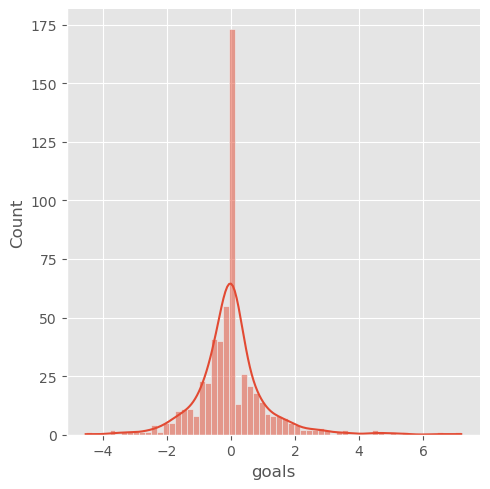

In [214]:
# finding and plotting residuals
# residuals = actual values - predictions
lr_residuals = y_test - lr_predictions
sns.displot(lr_residuals, kde = True)
plt.show()

#### *The normal distribution of residuals indicates that the model's predictions are unbiased and fit the data well, with errors evenly spread around zero*

####

#### *The residuals still maintain a normal distribution. This indicates that the model's predictions are unbiased and fit the data well, with errors evenly spread around zero*

#### *plotting Quantitle-Quantitle (QQ-Plot) of the model*

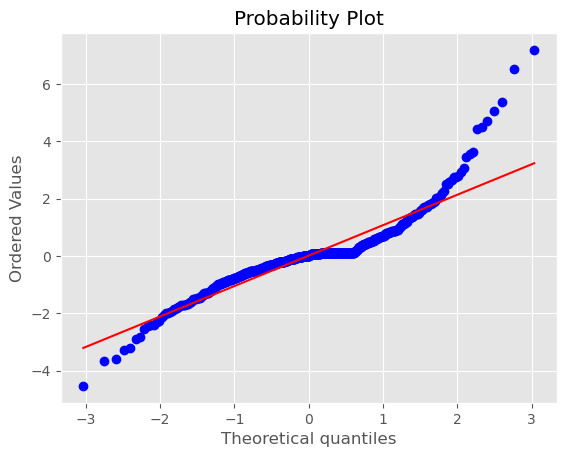

In [215]:
import scipy.stats as stats
import pylab

stats.probplot(lr_residuals, dist = 'norm', plot = pylab)
pylab.show()

#### *evaluating model*

In [216]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_rmse = math.sqrt(mean_squared_error(y_test, lr_predictions))

print(f'mean squared error of linear regression model is {round(lr_mse, 5)}')
print(f'mean absolute error of linear regression model is {round(lr_mae, 5)}')
print(f'root mean squared error of linear regression model is {round(lr_rmse, 5)}')

mean squared error of linear regression model is 1.29998
mean absolute error of linear regression model is 0.69777
root mean squared error of linear regression model is 1.14016


#### *finding the R-Squared of the model's train and test data*

In [130]:
lr_trainscore = lr.score(x_train, y_train)
lr_testscore = lr.score(x_test, y_test)
print(f'R-squared of train data: {lr_trainscore}')
print(f'R-squared of test data: {lr_testscore}')

R-squared of train data: 0.8657623876072417
R-squared of test data: 0.8716157374255935


#### Interpretation: 
##### *Training R²: 0.8657 - This indicates that approximately 86.57% of the variance in the training data is explained by your model. This suggests that your model fits the training data quite well.*

##### *Test R²: 0.8716 - This indicates that approximately 87.16% of the variance in the test data is explained by your model. This shows that your model performs well on unseen data,  slightly more  than on the training data.*

####

#### *training with Decision Tree Regressor*

In [132]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

In [133]:
#training the model
dtr.fit(x_train, y_train)

DecisionTreeRegressor()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


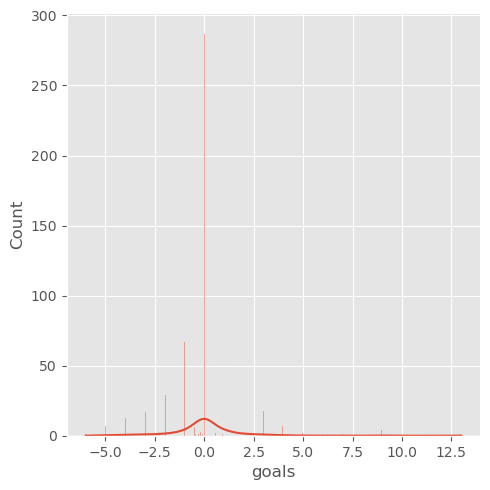

In [134]:
# making predictions
dtr_predictions = dtr.predict(x_test)

# finding and plotting residuals
# residuals = actual values - predictions
dtr_residuals = y_test - dtr_predictions
sns.displot(dtr_residuals, kde = True)
plt.show()

#### *The distribution of residuals iss moderately right skewed indicating that the model's predictions are biased and do not really fit the data well, with errors unevenly spread around zero*

#### *plotting Quantitle-Quantitle (QQ-Plot) of the model*

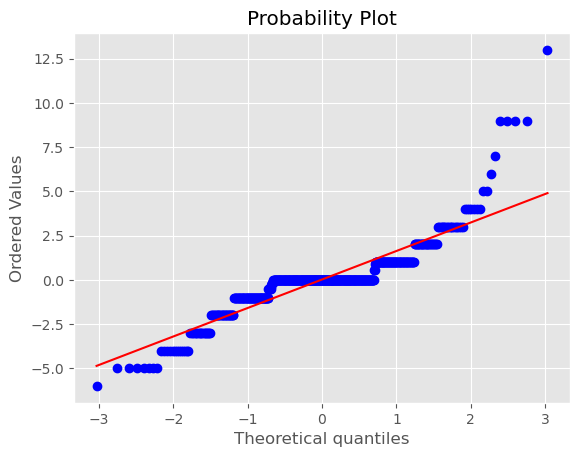

In [135]:
import scipy.stats as stats
import pylab

stats.probplot(dtr_residuals, dist = 'norm', plot = pylab)
pylab.show()

#### *There are some deviations from the red line at both ends of the plot, particularly in the lower left and upper right corners. This suggests that the tails of the distribution are slightly heavier than what would be expected in a perfect normal distribution*

#### *evaluating model*

In [136]:
dtr_mse = mean_squared_error(y_test, dtr_predictions)
dtr_mae = mean_absolute_error(y_test, dtr_predictions)
dtr_rmse = math.sqrt(mean_squared_error(y_test, dtr_predictions))

print(f'mean squared error of decision tree regression model is {round(dtr_mse, 5)}')
print(f'mean absolute error of decision tree regression model is {round(dtr_mae, 5)}')
print(f'root mean squared error of the decision tree regression model is {round(dtr_rmse, 5)}')


mean squared error of decision tree regression model is 3.22654
mean absolute error of decision tree regression model is 0.97672
root mean squared error of the decision tree regression model is 1.79626


#### *finding the R-Squared of the model's train and test data*

In [137]:
dtr_trainscore = dtr.score(x_train, y_train)
dtr_testscore = dtr.score(x_test, y_test)
print(f'R-squared of train data: {dtr_trainscore}')
print(f'R-squared of test data: {dtr_testscore}')

R-squared of train data: 0.9990540797270548
R-squared of test data: 0.6813503585285401


#### Interpretation: 
##### *Training R²: 0.999 - This extremely high R² value indicates that the model fits the training data very well, almost perfectly capturing the variance. However, this can also be a sign of overfitting, where the model has learned the training data too well, including noise.*

##### *Test R²: 0.68135 - This R² value on the test data is significantly lower than the training R², suggesting that the model does not generalize as well to new, unseen data. This discrepancy indicates that the model may be overfitting to the training data.*

####

#### *training with Support Vector Regressor*

In [138]:
from sklearn.svm import SVR
svr = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', SVR(kernel='rbf', C=1.0, epsilon=0.1))
])

In [139]:
#training the model
svr.fit(x_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('model', SVR())])

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


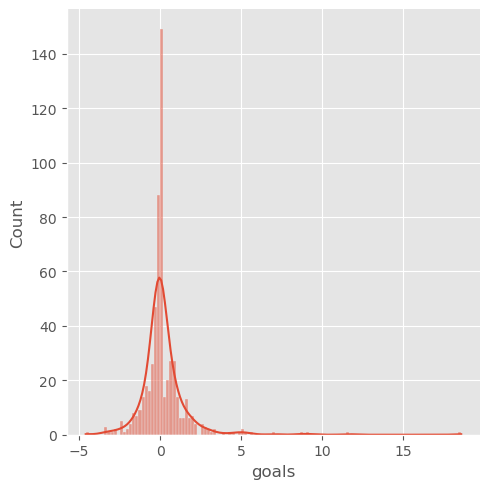

In [140]:
# making predictions
svr_predictions = svr.predict(x_test)

# finding and plotting residuals
# residuals = actual values - predictions
svr_residuals = y_test - svr_predictions
sns.displot(svr_residuals, kde = True)
plt.show()

#### *The distribution of residuals is right skewed indicating that the residuals (the differences between the observed and predicted values) have a skewed distribution to the right. In other words, there are more residuals with smaller values and a few with much larger ones. Here’s what it typically means and what you might want to consider:*

#### *plotting Quantitle-Quantitle (QQ-Plot) of the model*

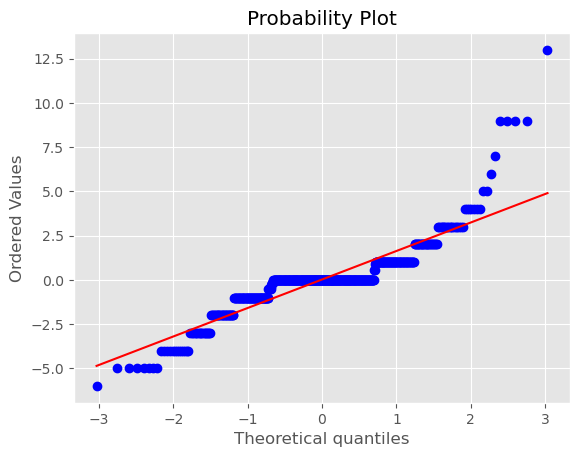

In [141]:
import scipy.stats as stats
import pylab

stats.probplot(dtr_residuals, dist = 'norm', plot = pylab)
pylab.show()

#### *The Q-Q plot suggests the data is approximately normally distributed but with slightly heavier tails and potential outliers, as evidenced by the points generally following the diagonal line in the center but deviating at both ends*

#### *evaluating model*

In [142]:
svr_mse = mean_squared_error(y_test, svr_predictions)
svr_mae = mean_absolute_error(y_test, svr_predictions)
svr_rmse = math.sqrt(mean_squared_error(y_test, svr_predictions))

print(f'mean squared error of support vector regression model is {round(svr_mse, 5)}')
print(f'mean absolute error of support vector regression model is {round(svr_mae, 5)}')
print(f'root mean squared error of the support vector regression model is {round(svr_rmse, 5)}')


mean squared error of support vector regression model is 2.44716
mean absolute error of support vector regression model is 0.76091
root mean squared error of the support vector regression model is 1.56434


#### *finding the R-Squared of the model's train and test data*

In [143]:
svr_trainscore = svr.score(x_train, y_train)
svr_testscore = svr.score(x_test, y_test)
print(f'R-squared of train data: {svr_trainscore}')
print(f'R-squared of test data: {svr_testscore}')

R-squared of train data: 0.7691128325901073
R-squared of test data: 0.7583212973480985


#### Interpretation: 
##### *Training R²: 0.76911 - An R-squared of 0.787 on the training data means that approximately 76.9% of the variance in the target variable is explained by the model on the training set.*

##### *Test R²: 0.7583 - An R-squared of 0.7583 on the test data means that the model explains about 75.8% of the variance in the target variable on unseen data.*

####

#### *training with K-Neighbor Regressor*

In [144]:
from sklearn.neighbors import KNeighborsRegressor
knr = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', KNeighborsRegressor(n_neighbors=5))
])

In [145]:
#training the model
knr.fit(x_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('model', KNeighborsRegressor())])

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


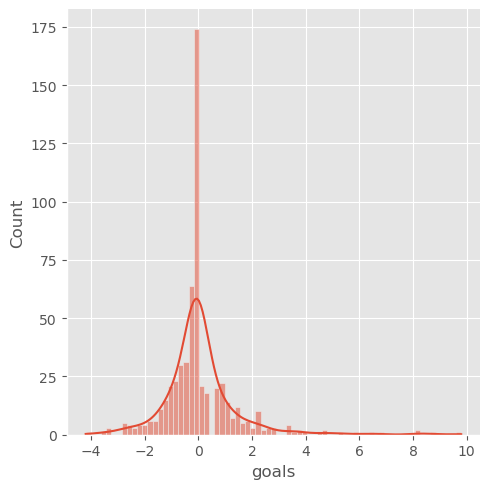

In [146]:
# making predictions
knr_predictions = knr.predict(x_test)

# finding and plotting residuals
# residuals = actual values - predictions
knr_residuals = y_test - knr_predictions
sns.displot(knr_residuals, kde = True)
plt.show()

#### *The distribution of residuals is slightly right skewed indicating that the residuals (the differences between the observed and predicted values) have a skewed distribution to the right. In other words, there are more residuals with smaller values and a few with much larger ones. Here’s what it typically means and what you might want to consider:*

#### *plotting Quantitle-Quantitle (QQ-Plot) of the model*

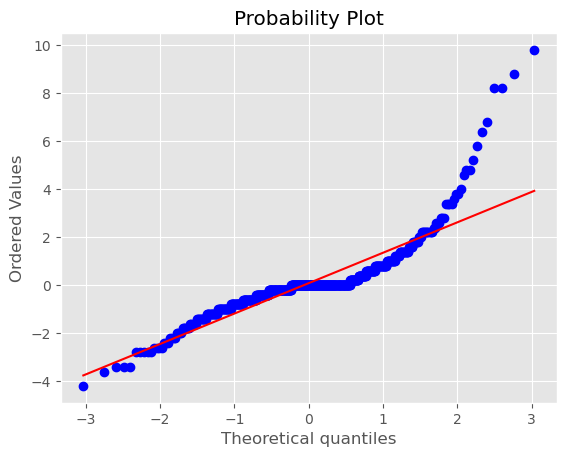

In [147]:
import scipy.stats as stats
import pylab

stats.probplot(knr_residuals, dist = 'norm', plot = pylab)
pylab.show()

#### *The Q-Q plot indicates that the data is generally normally distributed in the central region but exhibits heavier tails than a normal distribution, particularly in the upper tail where points deviate more substantially above the reference line, suggesting the presence of some extreme values or potential outliers in the dataset.*

#### *evaluating model*

In [148]:
knr_mse = mean_squared_error(y_test, knr_predictions)
knr_mae = mean_absolute_error(y_test, knr_predictions)
knr_rmse = math.sqrt(mean_squared_error(y_test, knr_predictions))

print(f'mean squared error of kneighbor regression model is {round(knr_mse, 5)}')
print(f'mean absolute error of kneighbor regression model is {round(knr_mae, 5)}')
print(f'root mean squared error of the kneighbor regression model is {round(knr_rmse, 5)}')


mean squared error of kneighbor regression model is 2.03832
mean absolute error of kneighbor regression model is 0.79335
root mean squared error of the kneighbor regression model is 1.4277


#### *finding the R-Squared of the model's train and test data*

In [149]:
knr_trainscore = knr.score(x_train, y_train)
knr_testscore = knr.score(x_test, y_test)
print(f'R-squared of train data: {knr_trainscore}')
print(f'R-squared of test data: {knr_testscore}')

R-squared of train data: 0.8662861140342486
R-squared of test data: 0.7986976718826673


#### Interpretation: 
##### *Training R²: 0.8662 - An R-squared of 0.894 on the training data means the model explains approximately 86.7% of the variance in the target variable on the training set. This indicates that the model fits the training data quite well.*

##### *Test R²: 0.79869 - An R-squared of 0.799 on the test data means the model explains about 79.9% of the variance in the target variable on unseen data. This is still a good performance, though slightly lower than on the training data.*

####

#### *training with Random Forest Regressor*

In [150]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100, random_state = 2)

In [151]:
# training the model
rfr.fit(x_train, y_train)

RandomForestRegressor(random_state=2)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


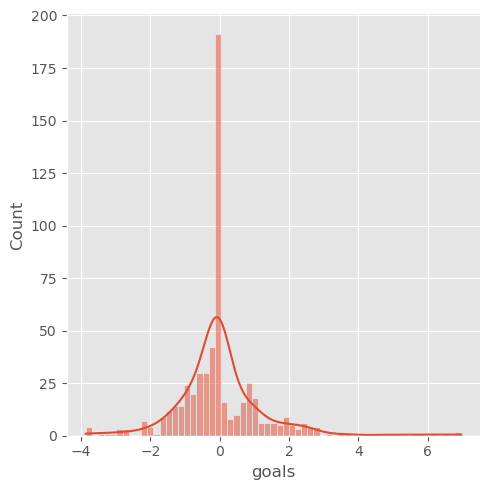

In [152]:
# making predictions
rfr_predictions = rfr.predict(x_test)

# finding and plotting residuals
# residuals = actual values - predictions
rfr_residuals = y_test - rfr_predictions
sns.displot(rfr_residuals, kde = True)
plt.show()

#### *Again, the distribution of residuals is slightly right skewed indicating that the residuals (the differences between the observed and predicted values) have a skewed distribution to the right. In other words, there are more residuals with smaller values and a few with much larger ones. Here’s what it typically means and what you might want to consider:*

#### *plotting Quantitle-Quantitle (QQ-Plot) of the model*

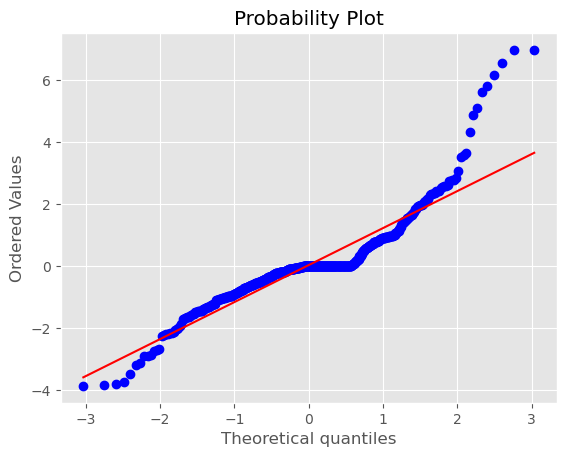

In [153]:
import scipy.stats as stats
import pylab

stats.probplot(rfr_residuals, dist = 'norm', plot = pylab)
pylab.show()

#### *The Q-Q plot suggests the data is approximately normally distributed in the central region, but exhibits heavy tails, particularly in the upper tail where points deviate substantially above the reference line, indicating the presence of extreme values or outliers in the dataset that exceed what would be expected in a perfectly normal distribution.*

#### *evaluating model*

In [154]:
rfr_mse = mean_squared_error(y_test, rfr_predictions)
rfr_mae = mean_absolute_error(y_test, rfr_predictions)
rfr_rmse = math.sqrt(mean_squared_error(y_test, rfr_predictions))

print(f'mean squared error of random forest regression model is {round(rfr_mse, 5)}')
print(f'mean absolute error of random forest regression model is {round(rfr_mae, 5)}')
print(f'root mean squared error of the random forest regression model is {round(rfr_rmse, 5)}')


mean squared error of random forest regression model is 1.66013
mean absolute error of random forest regression model is 0.77185
root mean squared error of the random forest regression model is 1.28846


#### *finding the R-Squared of the model's train and test data*

In [155]:
rfr_trainscore = rfr.score(x_train, y_train)
rfr_testscore = rfr.score(x_test, y_test)
print(f'R-squared of train data: {rfr_trainscore}')
print(f'R-squared of test data: {rfr_testscore}')

R-squared of train data: 0.9741938421744911
R-squared of test data: 0.8360469447527327


#### Interpretation: 
##### *Training R²: 0.9741 - An R-squared of 0.9741 on the training data means the model explains approximately 97.4% of the variance in the target variable on the training set. This indicates very high performance and suggests that the model fits the training data very well.*

##### *Test R²: 0.836 - An R-squared of 0.836 on the test data means the model explains about 83.6% of the variance in the target variable on the test set. This is still strong performance, though it's lower than the training data.*

####

#### *training with AdaBoost Regressor*

In [156]:
from sklearn.ensemble import AdaBoostRegressor
adr = AdaBoostRegressor(estimator = DecisionTreeRegressor(max_depth = None), n_estimators = 50, random_state = 3)

In [157]:
# training the model
adr.fit(x_train, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(), random_state=3)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


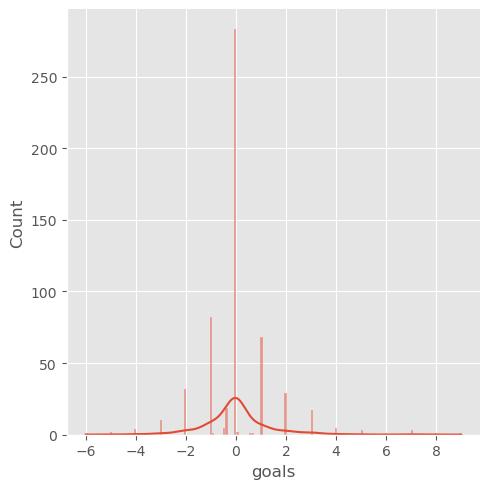

In [158]:
# making predictions
adr_predictions = adr.predict(x_test)

# finding and plotting residuals
# residuals = actual values - predictions
adr_residuals = y_test - adr_predictions
sns.displot(adr_residuals, kde = True)
plt.show()

#### *The normal distribution of residuals indicates that the model's predictions are unbiased and fit the data well, with errors evenly spread around zero*

#### *plotting Quantitle-Quantitle (QQ-Plot) of the model*

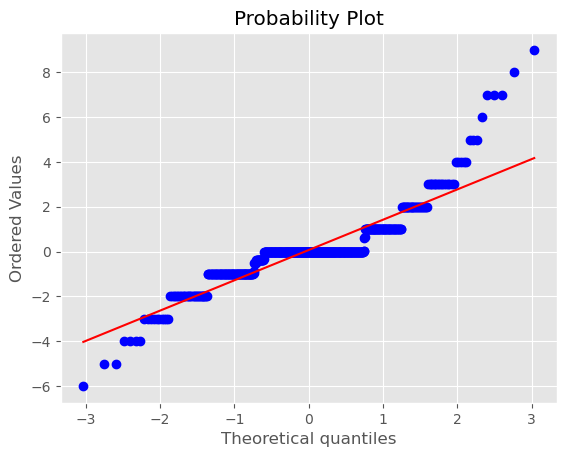

In [159]:
import scipy.stats as stats
import pylab

stats.probplot(adr_residuals, dist = 'norm', plot = pylab)
pylab.show()

#### *This Q-Q plot suggests that the data generally follows a normal distribution, but with some deviation from normality at the tails, particularly showing heavier tails than expected for a perfectly normal distribution.*

#### *evaluating model*

In [160]:
adr_mse = mean_squared_error(y_test, adr_predictions)
adr_mae = mean_absolute_error(y_test, adr_predictions)
adr_rmse = math.sqrt(mean_squared_error(y_test, adr_predictions))

print(f'mean squared error of adaboost regression model is {round(adr_mse, 5)}')
print(f'mean absolute error of radaboost regression model is {round(adr_mae, 5)}')
print(f'root mean squared error of the adaboost regression model is {round(adr_rmse, 5)}')


mean squared error of adaboost regression model is 2.23323
mean absolute error of radaboost regression model is 0.83279
root mean squared error of the adaboost regression model is 1.4944


#### *finding the R-Squared of the model's train and test data*

In [161]:
adr_trainscore = rfr.score(x_train, y_train)
adr_testscore = rfr.score(x_test, y_test)
print(f'R-squared of train data: {adr_trainscore}')
print(f'R-squared of test data: {adr_testscore}')

R-squared of train data: 0.9741938421744911
R-squared of test data: 0.8360469447527327


#### Interpretation: 
##### *Training R²: 0.97419 - The model explains about 97.41% of the variance in the training data. This indicates a very good fit on the training data.*

##### *Test R²: 0.836 - An R-squared of 0.836 on the test data means the model explains about 83.6% of the variance in the target variable on unseen data. The model explains about 83.6% of the variance in the test data. This shows that the model performs reasonably well on new, unseen data but has a slightly lower performance compared to the training data.*

####

#### *training with XGBoost Regressor*

In [162]:
from xgboost import XGBRegressor
xgr = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=None)

In [163]:
# train the model
xgr.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


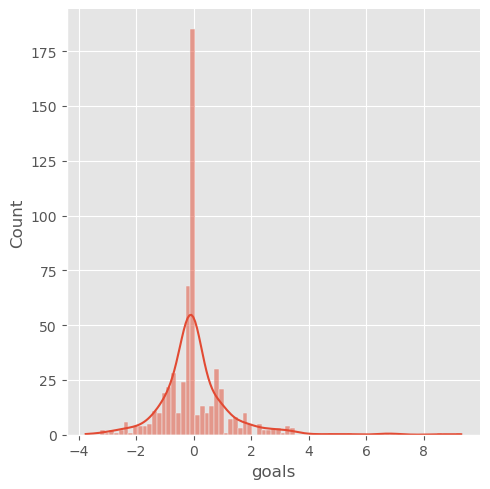

In [164]:
# making predictions
xgr_predictions = xgr.predict(x_test)

# finding and plotting residuals
# residuals = actual values - predictions
xgr_residuals = y_test - xgr_predictions
sns.displot(xgr_residuals, kde = True)
plt.show()

#### *The distribution of residuals is slightly right skewed indicating that the residuals (the differences between the observed and predicted values) have a skewed distribution to the right. In other words, there are more residuals with smaller values and a few with much larger ones. Here’s what it typically means and what you might want to consider:*

#### *plotting Quantitle-Quantitle (QQ-Plot) of the model*

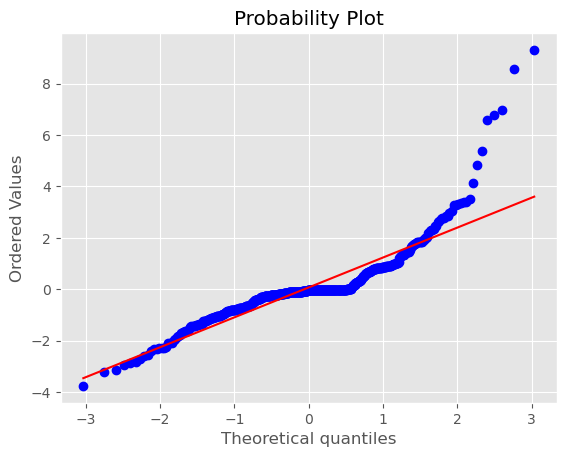

In [165]:
import scipy.stats as stats
import pylab

stats.probplot(xgr_residuals, dist = 'norm', plot = pylab)
pylab.show()

#### *The Q-Q plot indicates that the data generally follows a normal distribution in the middle range, but deviates from normality at both tails, showing heavier tails than expected for a perfectly normal distribution.*

#### *evaluating model*

In [166]:
xgr_mse = mean_squared_error(y_test, xgr_predictions)
xgr_mae = mean_absolute_error(y_test, xgr_predictions)
xgr_rmse = math.sqrt(mean_squared_error(y_test, xgr_predictions))

print(f'mean squared error of xgboost regression model is {round(xgr_mse, 5)}')
print(f'mean absolute error of xgboost regression model is {round(xgr_mae, 5)}')
print(f'root mean squared error of the xgboost regression model is {round(xgr_rmse, 5)}')


mean squared error of xgboost regression model is 1.67941
mean absolute error of xgboost regression model is 0.74829
root mean squared error of the xgboost regression model is 1.29592


#### *finding the R-Squared of the model's train and test data*

In [167]:
xgr_trainscore = xgr.score(x_train, y_train)
xgr_testscore = xgr.score(x_test, y_test)
print(f'R-squared of train data: {xgr_trainscore}')
print(f'R-squared of test data: {xgr_testscore}')

R-squared of train data: 0.95767443649949
R-squared of test data: 0.8341433402609204


#### Interpretation: 
##### *Training R²: 0.9577 - The model explains about 95.77% of the variance in the training data. This indicates a very good fit on the training data.*

##### *Test R²: 0.83414 - An R-squared of 0.83414 on the test data means the model explains about 83.41% of the variance in the target variable on unseen data. The model explains about 83.41% of the variance in the test data. This shows that the model performs reasonably well on new, unseen data but has a slightly lower performance compared to the training data.*

####

#### *training with GradientBoosting Regressor*

In [168]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state = 4)

In [169]:
# training the model
gbr.fit(x_train, y_train)

GradientBoostingRegressor(random_state=4)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


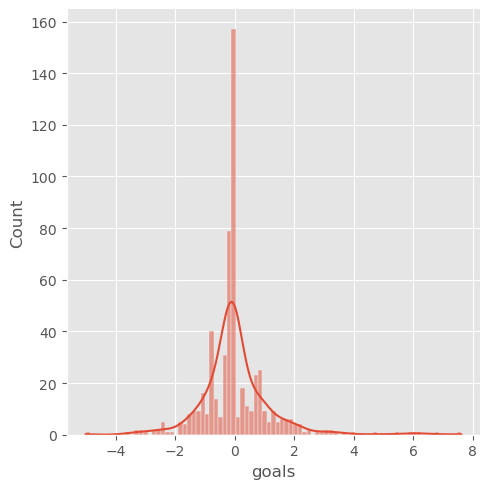

In [170]:
# making predictions
gbr_predictions = gbr.predict(x_test)

# finding and plotting residuals
# residuals = actual values - predictions
gbr_residuals = y_test - gbr_predictions
sns.displot(gbr_residuals, kde = True)
plt.show()

#### *The distribution of residuals is slightly right skewed indicating that the residuals (the differences between the observed and predicted values) have a skewed distribution to the right. In other words, there are more residuals with smaller values and a few with much larger ones. Here’s what it typically means and what you might want to consider:*

#### *plotting Quantitle-Quantitle (QQ-Plot) of the model*

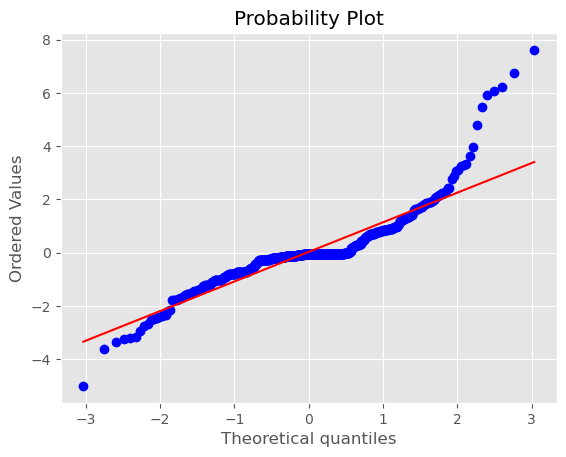

In [171]:
import scipy.stats as stats
import pylab

stats.probplot(gbr_residuals, dist = 'norm', plot = pylab)
pylab.show()

#### The Q-Q plot suggests that the data generally follows a normal distribution in the central region, but deviates from normality at both tails, exhibiting heavier tails than expected for a perfectly normal distribution, particularly noticeable at the upper tail.*

#### *evaluating model*

In [172]:
gbr_mse = mean_squared_error(y_test, gbr_predictions)
gbr_mae = mean_absolute_error(y_test, gbr_predictions)
gbr_rmse = math.sqrt(mean_squared_error(y_test, gbr_predictions))

print(f'mean squared error of gradient boosting regression model is {round(gbr_mse, 5)}')
print(f'mean absolute error of gradient boosting regression model is {round(gbr_mae, 5)}')
print(f'root mean squared error of the gradient boosting regression model is {round(gbr_rmse, 5)}')


mean squared error of gradient boosting regression model is 1.47345
mean absolute error of gradient boosting regression model is 0.72237
root mean squared error of the gradient boosting regression model is 1.21386


#### *finding the R-Squared of the model's train and test data*

In [173]:
gbr_trainscore = gbr.score(x_train, y_train)
gbr_testscore = gbr.score(x_test, y_test)
print(f'R-squared of train data: {gbr_trainscore}')
print(f'R-squared of test data: {gbr_testscore}')

R-squared of train data: 0.9091452275567465
R-squared of test data: 0.8544831566486725


#### Interpretation: 
##### *Training R²: 0.909 - The model explains about 92.04% of the variance in the training data. This indicates a very good fit on the training data.*

##### *Test R²: 0.854 - This result indicates that the model explains 82.36% of the variance in the test data. It suggests that the model generalizes reasonably well to new data, though there might still be room for improvement.*

####

#### *choosing the best models for hypertuning*
##### I will select the top 4 models for parameter hypertuning based on the following:
##### - test data R-squared 
##### - mean squared error
##### - mean absolute error
##### - root mean squared error
##### - residual distribution
###
##### *for each metric, the best model get 8 points, the 2nd best gets 7 points, the 2rd best gets 6 points, and so on and so forth*

In [174]:
model_results = pd.DataFrame({
    'r_squared':[lr_testscore, dtr_testscore, svr_testscore, knr_testscore,
rfr_testscore, adr_testscore, xgr_testscore, gbr_testscore],
    'mean_squared_error':[lr_mse, dtr_mse, svr_mse, knr_mse, rfr_mse, adr_mse, xgr_mse, gbr_mse],
    'mean_absolute_error':[lr_mae, dtr_mae, svr_mae, knr_mae, rfr_mae, adr_mae, xgr_mae, gbr_mae],
    'root_mean_squared_error':[lr_rmse, dtr_rmse, svr_rmse, knr_rmse, rfr_rmse, adr_rmse, xgr_rmse, gbr_rmse],
    'residual_plot':['normally distributed', 'normally distributed', 'normally distributed', 'normally distributed', 'normally distributed', 
                     'normally distributed', 'normally distributed', 'normally distributed'] 
}, index = ['linear regression', 'decision tree regressor', 'support vector regressor', 'kneighbor regressor', 
            'random forest regressor', 'adaboost regressor', 'xgboost regressor', 'gradient boosting regressor'])

model_results




,r_squared,mean_squared_error,mean_absolute_error,root_mean_squared_error,residual_plot
linear regression,0.871616,1.299975,0.697774,1.140165,normally distributed
decision tree regressor,0.681350,3.226538,0.976724,1.796257,normally distributed
support vector regressor,0.758321,2.447156,0.760907,1.564339,normally distributed
kneighbor regressor,0.798698,2.038319,0.793345,1.427697,normally distributed
random forest regressor,0.836047,1.660133,0.771846,1.288461,normally distributed
adaboost regressor,0.836047,2.233233,0.832788,1.494401,normally distributed
xgboost regressor,0.834143,1.679408,0.748287,1.295920,normally distributed
gradient boosting regressor,0.854483,1.473454,0.722371,1.213859,normally distributed


#### *best models by r-squared score on test data*

In [175]:
model_results['r_squared'].sort_values(ascending = False)

linear regression              0.871616
gradient boosting regressor    0.854483
random forest regressor        0.836047
adaboost regressor             0.836047
xgboost regressor              0.834143
kneighbor regressor            0.798698
support vector regressor       0.758321
decision tree regressor        0.681350
Name: r_squared, dtype: float64

#### scores:
###### linear regression: 8
###### gradient boosting regressor: 7
###### random forest regressor: 6
###### adaboost regressor: 5
###### xgboost regressor: 4
###### kneighbor regressor: 3
###### support vector regressor: 2
###### decision tree regressor: 1

#### *best models by least mean squared error*

In [176]:
model_results['mean_squared_error'].sort_values()

linear regression              1.299975
gradient boosting regressor    1.473454
random forest regressor        1.660133
xgboost regressor              1.679408
kneighbor regressor            2.038319
adaboost regressor             2.233233
support vector regressor       2.447156
decision tree regressor        3.226538
Name: mean_squared_error, dtype: float64

#### scores:
###### linear regression: 16
###### gradient boosting regressor: 14
###### random forest regressor: 12
###### adaboost regressor: 8
###### xgboost regressor: 9
###### kneighbor regressor: 7
###### support vector regressor: 4
###### decision tree regressor: 2

#### *best models by least mean absolute error*

In [177]:
model_results['mean_absolute_error'].sort_values()

linear regression              0.697774
gradient boosting regressor    0.722371
xgboost regressor              0.748287
support vector regressor       0.760907
random forest regressor        0.771846
kneighbor regressor            0.793345
adaboost regressor             0.832788
decision tree regressor        0.976724
Name: mean_absolute_error, dtype: float64

#### scores:
###### linear regression: 24
###### gradient boosting regressor: 21
###### random forest regressor: 16
###### adaboost regressor: 10
###### xgboost regressor: 15
###### kneighbor regressor: 10
###### support vector regressor: 9
###### decision tree regressor: 3

#### *best models by least root mean squared error*

In [178]:
model_results['root_mean_squared_error'].sort_values()

linear regression              1.140165
gradient boosting regressor    1.213859
random forest regressor        1.288461
xgboost regressor              1.295920
kneighbor regressor            1.427697
adaboost regressor             1.494401
support vector regressor       1.564339
decision tree regressor        1.796257
Name: root_mean_squared_error, dtype: float64

#### scores:
###### linear regression: 32
###### gradient boosting regressor: 28
###### random forest regressor: 22
###### adaboost regressor: 13
###### xgboost regressor: 20
###### kneighbor regressor: 14
###### support vector regressor: 11
###### decision tree regressor: 4

#### top 5 models based on the metrics

###### 1. linear regression
###### 2. gradient boosting regressor
###### 3. random forest regressor
###### 4. xgboost regressor
###### 5. kneighbor regressor

###

## hyperparamter tuning

###

#### *gradient descent hyperparameter tuning*

In [179]:
from sklearn.model_selection import GridSearchCV

In [180]:
# defining parameters
gp = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0]
}

# Perform Grid Search
ggs = GridSearchCV(estimator=gbr, param_grid=gp, cv=5, scoring='neg_mean_squared_error')

In [181]:
# training the hypertuned gradient descent model
ggs.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=4),
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='neg_mean_squared_error')

In [182]:
# finding the best parameters
ggs.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}

In [183]:
# making predictions
ggsp = ggs.predict(x_test)

#### *evaluating model*

In [184]:
ggsp_mse = mean_squared_error(y_test, ggsp)
ggsp_mae = mean_absolute_error(y_test, ggsp)
ggsp_rmse = math.sqrt(mean_squared_error(y_test, ggsp))

print(f'mean squared error of hypertuned gradient boosting regression model is {round(ggsp_mse, 5)}')
print(f'mean absolute error of hypertuned gradient boosting regression model is {round(ggsp_mae, 5)}')
print(f'root mean squared error of the hypertuned gradient boosting regression model is {round(ggsp_rmse, 5)}')


mean squared error of hypertuned gradient boosting regression model is 1.44835
mean absolute error of hypertuned gradient boosting regression model is 0.74987
root mean squared error of the hypertuned gradient boosting regression model is 1.20348


##
#### *kneighbor hyperparameter tuning*

In [185]:
# defining parameters
knnp = {
    'n_neighbors': [3, 5, 7, 10, 15],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40, 50]
}
#creating kneighbor base model
kbase = KNeighborsRegressor()

# Perform Grid Search
knngs = GridSearchCV(estimator=kbase, param_grid = knnp, cv=5, scoring='neg_mean_squared_error')

In [186]:
# training the hypertuned gradient descent model
knngs.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [20, 30, 40, 50],
                         'n_neighbors': [3, 5, 7, 10, 15], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [187]:
# finding the best parameters
knngs.best_params_

{'algorithm': 'auto',
 'leaf_size': 20,
 'n_neighbors': 7,
 'p': 2,
 'weights': 'distance'}

In [188]:
# making predictions
knngsp = knngs.predict(x_test)

#### *evaluating model*

In [189]:
knngs_mse = mean_squared_error(y_test, knngsp)
knngs_mae = mean_absolute_error(y_test, knngsp)
knngs_rmse = math.sqrt(mean_squared_error(y_test, knngsp))

print(f'mean squared error of hypertuned kneighbor regression model is {round(knngs_mse, 5)}')
print(f'mean absolute error of hypertuned kneighbor regression model is {round(knngs_mae, 5)}')
print(f'root mean squared error of the hypertuned kneighbor regression model is {round(knngs_rmse, 5)}')


mean squared error of hypertuned kneighbor regression model is 2.26988
mean absolute error of hypertuned kneighbor regression model is 0.79956
root mean squared error of the hypertuned kneighbor regression model is 1.50661


##
#### *random forest hyperparameter tuning*

In [190]:
# defining parameters
rfp = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search
rfgs = GridSearchCV(estimator = rfr, param_grid = rfp, cv = 5, scoring = 'neg_mean_squared_error')

In [191]:
# training the hypertuned random forest model
rfgs.fit(x_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFore

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=2),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [192]:
# finding the best parameters
rfgs.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 200}

In [193]:
# making predictions
rfgsp = rfgs.predict(x_test)

#### *evaluating model*

In [194]:
rfgs_mse = mean_squared_error(y_test, rfgsp)
rfgs_mae = mean_absolute_error(y_test, rfgsp)
rfgs_rmse = math.sqrt(mean_squared_error(y_test, rfgsp))

print(f'mean squared error of hypertuned random forest regression model is {round(rfgs_mse, 5)}')
print(f'mean absolute error of hypertuned random forest regression model is {round(rfgs_mae, 5)}')
print(f'root mean squared error of the hypertuned random forest regression model is {round(rfgs_rmse, 5)}')


mean squared error of hypertuned random forest regression model is 1.43737
mean absolute error of hypertuned random forest regression model is 0.72352
root mean squared error of the hypertuned random forest regression model is 1.1989


###### *this performs way better than the original random forest model*

##
#### *linear regression hypertuning via lasso regression*

In [195]:
from sklearn.linear_model import Lasso
l = Lasso()

#training
l.fit(x_train, y_train)

# making predictions
lp = l.predict(x_test)

# evaluating lasso regression model
l_mse = mean_squared_error(y_test, lp)
l_mae = mean_absolute_error(y_test, lp)
l_rmse = math.sqrt(mean_squared_error(y_test, lp))

print(f'mean squared error of base lassso regression model is {round(l_mse, 5)}')
print(f'mean absolute error of base lassso regression model is {round(l_mae, 5)}')
print(f'root mean squared error of base lassso regression model is {round(l_rmse, 5)}')


mean squared error of base lassso regression model is 1.61838
mean absolute error of base lassso regression model is 0.73825
root mean squared error of base lassso regression model is 1.27215


In [196]:
# r-squared of lasso regression model
l_trainscore = l.score(x_train, y_train)
l_testscore = l.score(x_test, y_test)
print(f'R-squared of train data: {l_trainscore}')
print(f'R-squared of test data: {l_testscore}')

R-squared of train data: 0.8450933015828279
R-squared of test data: 0.8401706633687134


##
#### *linear regression hypertuning via ridge regression*

In [197]:
from sklearn.linear_model import Ridge
r = Ridge()

#training
r.fit(x_train, y_train)

# making predictions
rp = r.predict(x_test)

# evaluating lasso regression model
r_mse = mean_squared_error(y_test, rp)
r_mae = mean_absolute_error(y_test, rp)
r_rmse = math.sqrt(mean_squared_error(y_test, rp))

print(f'mean squared error of base ridge regression model is {round(r_mse, 5)}')
print(f'mean absolute error of base ridge regression model is {round(r_mae, 5)}')
print(f'root mean squared error of base ridge regression model is {round(r_rmse, 5)}')


mean squared error of base ridge regression model is 1.30006
mean absolute error of base ridge regression model is 0.69778
root mean squared error of base ridge regression model is 1.1402


In [201]:
# r-squared of lasso regression model
r_trainscore = r.score(x_train, y_train)
r_testscore = r.score(x_test, y_test)
print(f'R-squared of train data: {r_trainscore}')
print(f'R-squared of test data: {r_testscore}')

R-squared of train data: 0.8657623815748616
R-squared of test data: 0.871607141842627


##### *the base Ridge Regression model is performing much better! This suggests that L2 regularization (used by Ridge) suits your dataset better than the L1 regularization of Lasso. Ridge tends to work well when all features are contributing somewhat to the prediction, without forcing coefficients to zero, which might be why it's outperforming Lasso.*

##
#### *hypertuning ridge regression model*

In [149]:
# defining parameters
r_params = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],  
    'max_iter': [500, 1000, 2000, 5000, 10000],              
    'tol': [1e-6, 1e-5, 1e-4, 1e-3]                           
}

# Perform Grid Search
r_gs = GridSearchCV(estimator = Ridge(), param_grid = r_params, cv = 5, scoring = 'neg_mean_squared_error')


In [150]:
# training the model
r_gs.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [500, 1000, 2000, 5000, 10000],
                         'tol': [1e-06, 1e-05, 0.0001, 0.001]},
             scoring='neg_mean_squared_error')

In [151]:
# making predictions
r_gsp = l.predict(x_test)

# evaluating lasso regression model
r_gs_mse = mean_squared_error(y_test, r_gsp)
r_gs_mae = mean_absolute_error(y_test, r_gsp)
r_gs_rmse = math.sqrt(mean_squared_error(y_test, r_gsp))

print(f'mean squared error of base lassso regression model is {round(r_gs_mse, 5)}')
print(f'mean absolute error of base lassso regression model is {round(r_gs_mae, 5)}')
print(f'root mean squared error of base lassso regression model is {round(r_gs_rmse, 5)}')

mean squared error of base lassso regression model is 1.50203
mean absolute error of base lassso regression model is 0.74665
root mean squared error of base lassso regression model is 1.22557


#### *performs worse than the base ridge regression model*

##
#### *trying a voting regressor*

In [154]:
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import r2_score

# Define base models
base_model1 = Ridge(alpha=1.0)  # Base Ridge model
base_model2 = GradientBoostingRegressor()  # Another example base model
base_model3 = RandomForestRegressor()  # Another example base model

# Create the ensemble model
voting_regressor = VotingRegressor(estimators=[
    ('ridge', base_model1),
    ('gb', base_model2),
    ('rf', base_model3)
])

# Fit the ensemble model
voting_regressor.fit(x_train, y_train)

# Make predictions and evaluate
y_pred_voting = voting_regressor.predict(x_test)
mse_voting = mean_squared_error(y_test, y_pred_voting)
rmse_voting = math.sqrt(mean_squared_error(y_test, y_pred_voting))
mae_voting = mean_absolute_error(y_test, y_pred_voting)
r2_voting = voting_regressor.score(x_test, y_test)

print(f"Voting Regressor MSE: {mse_voting}")
print(f"Voting Regressor MAE: {mae_voting}")
print(f"Voting Regressor RMSE: {rmse_voting}")
print(f"Voting Regressor R-squared: {r2_voting}")


Voting Regressor MSE: 1.5124621382883747
Voting Regressor MAE: 0.7189073601940892
Voting Regressor RMSE: 1.2298219945538358
Voting Regressor R-squared: 0.8286604985488437


##
#### *hypertuning XGBoost regressor*

In [199]:
# Import necessary libraries
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error


# Define the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

# Set up the hyperparameter grid
xgrid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize GridSearchCV
xgsearch = GridSearchCV(estimator=xgb_model,
                           param_grid=xgrid,
                           scoring='neg_mean_squared_error',
                           cv=5,
                           n_jobs=-1,
                           verbose=1)

# Fit GridSearchCV
xgsearch.fit(x_train, y_train)

# Retrieve the best parameters and model
best_params = xgsearch.best_params_
best_model = xgsearch.best_estimator_
print(f"Best Parameters: {best_params}")

# Make predictions and evaluate the model
xgpreds = best_model.predict(x_test)

# evaluating
xmse = mean_squared_error(y_test, xgpreds)
xmae = mean_absolute_error(y_test, xgpreds)
xrmse = math.sqrt(mean_squared_error(y_test, xgpreds))

print(f'mean squared error of base lassso regression model is {round(xmse, 5)}')
print(f'mean absolute error of base lassso regression model is {round(xmae, 5)}')
print(f'root mean squared error of base lassso regression model is {round(xrmse, 5)}')

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 300, 'subsample': 0.9}
mean squared error of base lassso regression model is 1.53276
mean absolute error of base lassso regression model is 0.75627
root mean squared error of base lassso regression model is 1.23805


###
#### *hyperparameter tuning results*

##### *Ridge Regression performed the best of all the hypertuned models*
##### It had the best mean squared error: 1.37173
##### It had the best mean absolute error: 0.71134
##### It had the best root mean squared error: 1.17121
##### It had the best r-squared: 0.8446

###
#### *comparing the best hyper-tuned model (lasso regression) VS the best base model (linear regression)*

In [202]:
print(f'ridge regression mean squared error: {round(r_mse, 5)}')
print(f'linear regression mean squared error: {round(lr_mse, 5)}')
print('\n')
print(f'ridge regression mean absolute error: {round(r_mae, 5)}')
print(f'linear regression mean absolute error: {round(lr_mae, 5)}')
print('\n')
print(f'ridge regression root mean squared error: {round(r_rmse, 5)}')
print(f'linear regression root mean squared error: {round(lr_rmse, 5)}')
print('\n')
print(f'ridge regression r-squared: {round(r_testscore, 5)}')
print(f'linear regression r-squared: {round(lr_testscore, 5)}')

ridge regression mean squared error: 1.30006
linear regression mean squared error: 1.29998


ridge regression mean absolute error: 0.69778
linear regression mean absolute error: 0.69777


ridge regression root mean squared error: 1.1402
linear regression root mean squared error: 1.14016


ridge regression r-squared: 0.87161
linear regression r-squared: 0.87162


##### *as evident, the ridge regression model performs better across all four performance metrics: mean squared error, mean absolute error, root mean squared error, r-squared*

###
#### *best model (base linear regression) evaluation*

In [217]:
from sklearn.model_selection import cross_val_score

# Evaluate the finalized model with cross-validation
cv_scores = cross_val_score(lr, x_selected, y, cv=5, scoring='r2')
print("Cross-validated R-squared scores: ", cv_scores)
print("Mean R-squared score: ", cv_scores.mean())

Cross-validated R-squared scores:  [0.8043007  0.89221745 0.87303251 0.86875365 0.85690154]
Mean R-squared score:  0.8590411678391565


###
#### *interpreting results of the best model (base linear regression)*

In [227]:
coefficients = pd.DataFrame(lr.coef_, index=x.columns[:len(lr.coef_)], columns=['Coefficient'])
coefficients.sort_values(by='Coefficient', ascending=False)

,Coefficient
expected_goals,0.981176
expected_assists,0.053790
assists,0.027932
penalties_attempted,0.026917
progressive_runs,-0.000274


In [221]:
# Check the shape of x and the coefficients
print("Shape of X:", x.shape)
print("Number of coefficients:", len(lr.coef_))

Shape of X: (2851, 11)
Number of coefficients: 5


###
### *visualizing feature importance*

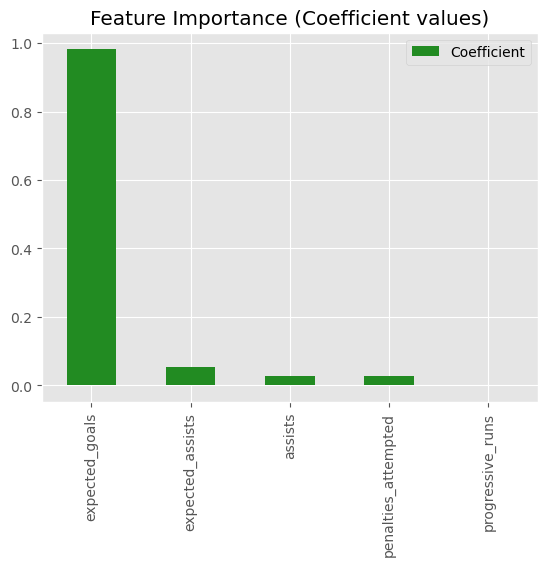

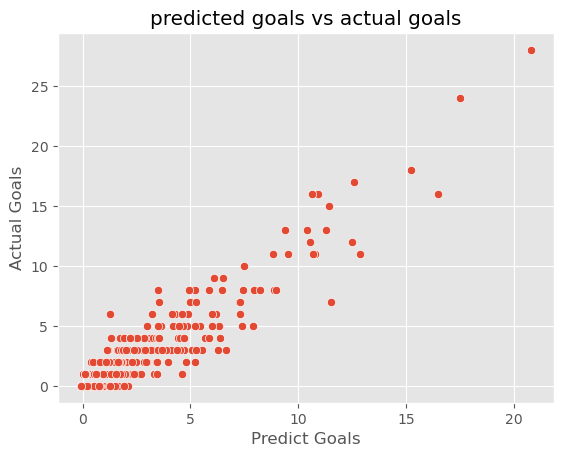

In [226]:
# Plotting the feature importance
coefficients.sort_values(by='Coefficient', ascending=False).plot(kind='bar', color = 'forestgreen')
plt.title('Feature Importance (Coefficient values)')
plt.show()
print('\n\n')
sns.scatterplot(x = lr_predictions, y = y_test)
plt.title('predicted goals vs actual goals')
plt.xlabel('Predict Goals')
plt.ylabel('Actual Goals')
plt.show()

### **HIGHLIGHTS FROM THE FEATURE IMPORTANCE GRAPH**

##### 1. Expected goals are by far the most influential feature, with a coefficient value close to 1.0, dwarfing all other features in importance
##### 2. There's a dramatic drop-off in importance after expected goals, with the next most important features having coefficients around 0.05 or less
##### 3. Expected assists and actual assists have similar levels of importance, ranked second and third respectively, but their impact is much smaller than expected goals
##### 4. Penalties attempted have very little influence on the model, with a barely visible coefficient value
##### 5. Progressive runs appear to have negligible impact, with a coefficient value so close to zero it's not visibly represented on the graph

#
### **HIGHLIGHTS FROM THE PREDICTED VS ACTUAL GOALS SCATTERPLOT**

##### 1. There's a clear positive correlation between predicted and actual goals, indicating the model has some predictive power
##### 2. The relationship appears to be roughly linear, with actual goals generally increasing as predicted goals increase.
##### 3. There's a significant scatter around the trend, suggesting the model's predictions are far from perfect and there's considerable variability in outcomes
##### 4. The model seems to slightly underestimate goals for high-scoring players/teams, as many points in the upper right are above where a perfect prediction line would be
##### 5. Most predictions and actual outcomes cluster in the lower range (0-10 goals), with fewer data points for higher goal totals, reflecting the typical distribution of goal-scoring in soccer/football
######

#### **FURTHER VALIDATION**

In [228]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(lr, x, y, cv=5, scoring='neg_mean_squared_error')

# Print cross-validation results
print("Cross-validated MSE: ", -cv_scores.mean())


Cross-validated MSE:  1.375391362009589


#### ** INTERPRETATION**

##### This metric shows the average error of your model across different subsets of your data. The value of 1.375 is quite close to the test set MSE of 1.36539, which suggests that your model is likely to perform consistently well on new data

#####
#### **FINAL THOUGHTS**

##### Despite all the steps and analyses, it’s interesting to see that the simplest model—Linear Regression—performed best.
######
##### This is a valuable insight that underscores the importance of simplicity in modeling, and that sometimes, more complex models aren’t necessarily better

#####
#### **Implementing LIME (Local Interpretable Model-agnostic Explanations):**

In [284]:
 pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.0 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=95e185c18dd53281832f9d3f3994af26fcab533f8433c12a0dcccc3205d1b6b1
  Stored in directory: /Users/melki/Library/Caches/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime

[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: /opt/anaconda3/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [285]:
import lime
from lime.lime_tabular import LimeTabularExplainer

In [286]:
explainer = LimeTabularExplainer(x_train, feature_names = x.columns, class_names = ['target'], mode = 'regression')

# Explain a single prediction
i = 10  # Index of the test sample you want to explain
exp = explainer.explain_instance(x_test[i], lr.predict, num_features=5)

# Show the explanation
exp.show_in_notebook(show_table=True)
exp.save_to_file('lime_explanation.html')

#### ** INTERPRETATION**

##### The model's prediction is heavily influenced by the high expected goals (8.20) and expected assists (2.60), which both exceed their respective thresholds (2.00 and 1.70). These factors push the prediction in a positive direction. The high number of progressive runs (115.00) and actual assists (4.00) also contribute positively, but to a lesser extent. The absence of penalties attempted (0.00) has a slight negative influence, but it's minimal compared to the positive factors. Overall, this explanation suggests that the player or team being analyzed is expected to perform well offensively, with a strong emphasis on goal-scoring and assist-making potential.